<a href="https://colab.research.google.com/github/SophiaHe/coinmarketcap/blob/main/coinmarketcap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install dash
import pandas as pd
import numpy as np
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

In [ ]:
import json
# df = json.loads("2020-08-21T20_07_05.899Z.json")
with open('2020-08-21T20_07_05.899Z.json') as f:
  temp = json.load(f)

for x in temp:
  print(x)

#print(temp['data']['quote'])




status
data


In [ ]:
df = pd.DataFrame(temp['data'])

#df['quote'].head()
print(list(df['quote'].items())[0])
df_quote = df['quote'].apply(pd.Series)
#print(df2.info())
#print(df2.head())

# USD dict
df_quote2 = df_quote['USD'].apply(pd.Series)
df_quote2.columns = ['quote_usd_' + str(col)  for col in df_quote2.columns]
print(df_quote2.info())
print(df_quote2.head())

# platform dict
#print(list(df['platform'].items())[3])
df_platform = df['platform'].apply(pd.Series)
df_platform.columns = ["platform_" + str(col) for col in df_platform.columns]
#df_platform.info()
#df_platform.head()

# append together
#df = df.append([df_quote2,df_platform])
df = pd.concat([df, df_quote2], axis=1)
df = pd.concat([df, df_platform], axis=1)
df = df.drop(['quote','platform'],1)
df.info()
#df.head()


(0, {'USD': {'price': 11698.4362429, 'volume_24h': 22543977312.0752, 'percent_change_1h': -0.057789, 'percent_change_24h': -1.56616, 'percent_change_7d': -0.819135, 'market_cap': 216036987434.9231, 'last_updated': '2020-08-21T20:06:32.000Z'}})
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3154 entries, 0 to 3153
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   quote_usd_price               3146 non-null   float64
 1   quote_usd_volume_24h          2902 non-null   float64
 2   quote_usd_percent_change_1h   3146 non-null   float64
 3   quote_usd_percent_change_24h  3139 non-null   float64
 4   quote_usd_percent_change_7d   3084 non-null   float64
 5   quote_usd_market_cap          2154 non-null   float64
 6   quote_usd_last_updated        3154 non-null   object 
dtypes: float64(6), object(1)
memory usage: 172.6+ KB
None
   quote_usd_price  ...    quote_usd_last_updated
0     1169

In [ ]:
df['quote_usd_percent_change_24h'].describe()
#df['quote_usd_percent_change_24h'].isnull().sum()
print(df.sort_values('quote_usd_percent_change_24h', ascending=False)[['name','quote_usd_percent_change_24h','total_supply']].head(10))

              name  quote_usd_percent_change_24h  total_supply
554        YF Link                       380.252  5.000000e+04
856           Omix                       313.891  3.000000e+09
2945  Pyrrhos Gold                       267.087  1.500000e+07
1245         TCASH                       266.004  8.800000e+07
1638    Asura Coin                       262.092  1.000000e+09
1813     SnodeCoin                       195.813  4.314997e+07
2906        SalPay                       178.631  1.000000e+08
929    BitNewChain                       177.882  5.612432e+08
222      VestChain                       169.864  8.848000e+09
945      FREE Coin                       146.857  1.000000e+13


In [ ]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip

### Run ngrok to tunnel Dash app port 8050 to the outside world. 
### This command runs in the background.
get_ipython().system_raw('./ngrok http 8050 &')

### Get the public URL where you can access the Dash app. Copy this URL.
! curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

### Install Dash
!pip install dash==0.31.1  # The core dash backend
!pip install dash-html-components==0.13.2  # HTML components
!pip install dash-core-components==0.39.0  # Supercharged components
!pip install dash-table==3.1.7  # Interactive DataTable component (new!)

--2020-10-15 20:33:33--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 52.54.124.219, 35.174.46.144, 3.213.223.141, ...
Connecting to bin.equinox.io (bin.equinox.io)|52.54.124.219|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13773305 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip.1’

ngrok-stable-linux- 100%[===================>]  13.13M  6.33MB/s    in 2.1s    

2020-10-15 20:33:36 (6.33 MB/s) - ‘ngrok-stable-linux-amd64.zip.1’ saved [13773305/13773305]

Archive:  ngrok-stable-linux-amd64.zip
replace ngrok? [y]es, [n]o, [A]ll, [N]one, [r]ename: yes
  inflating: ngrok                   
https://48327246af65.ngrok.io
     |████████████████████████████████| 3.9MB 2.8MB/s 
  Created wheel for dash-core-components: filename=dash_core_components-0.39.0-cp36-none-any.whl size=3886517 sha256=020fd5c6134d8854e22021652bff1099dfb080e533ddd39757ff4e41762b3359
  Stored in direct

In [ ]:
%%sh
pip install -q dash
pip install -q dash_core_components
pip install -q dash_html_components
pip install -q dash_table

In [ ]:
%%sh
# get ngrok
curl -O https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
unzip ngrok-stable-linux-amd64.zip

Archive:  ngrok-stable-linux-amd64.zip


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 13.1M  100 13.1M    0     0  4693k      0  0:00:02  0:00:02 --:--:-- 4691k
replace ngrok? [y]es, [n]o, [A]ll, [N]one, [r]ename:  NULL
(EOF or read error, treating as "[N]one" ...)


In [ ]:
%%writefile dash_app.py

import dash
import dash_core_components as dcc
import dash_html_components as html

external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

app = dash.Dash(__name__)#, external_stylesheets=external_stylesheets)

app.layout = html.Div(children=[
    html.H1(children='Hello Dash'),

    html.Div(children='''
        Dash: A web application framework for Python.
    '''),

    dcc.Graph(
        id='example-graph',
        figure={
            'data': [
                {'x': [1, 2, 3], 'y': [4, 1, 2], 'type': 'bar', 'name': 'SF'},
                {'x': [1, 2, 3], 'y': [2, 4, 5], 'type': 'bar', 'name': u'Montréal'},
            ],
            'layout': {
                'title': 'Dash Data Visualization'
            }
        }
    )
])

if __name__ == '__main__':
    app.run_server(debug=True)


Overwriting dash_app.py


In [ ]:
# launch ngrok
get_ipython().system_raw('./ngrok http 8050 &')

In [ ]:
%%sh
# get url with ngrok
curl -s http://localhost:4040/api/tunnels | python3 -c "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

https://48327246af65.ngrok.io


In [ ]:
### Run Dash app
!python dash_app.py

Running on http://127.0.0.1:8050/
Debugger PIN: 041-525-216
 * Serving Flask app "dash_app" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on
Traceback (most recent call last):
  File "dash_app.py", line 32, in <module>
    app.run_server(debug=True)
  File "/usr/local/lib/python3.6/dist-packages/dash/dash.py", line 1288, in run_server
    **flask_run_options)
  File "/usr/local/lib/python3.6/dist-packages/flask/app.py", line 990, in run
    run_simple(host, port, self, **options)
  File "/usr/local/lib/python3.6/dist-packages/werkzeug/serving.py", line 1030, in run_simple
    s.bind(server_address)
OSError: [Errno 98] Address already in use


## **Scrape from coinmastercap**

### **1. Using its API (limited data)**

In [ ]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
import pandas as pd

In [ ]:
# with 333 credit limit per day!!!!!
url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'10',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '8dd5c0fc-5c15-45dc-8e66-50303ae1902d',
}

#session = Session()
#session.headers.update(headers)


try:
  #response = session.get(url, params=parameters)
  #data = json.loads(response.text)
  print(data['data'][0])
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 9529, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channels'], 'max_supply': 21000000, 'circulating_supply': 18514006, 'total_supply': 18514006, 'platform': None, 'cmc_rank': 1, 'last_updated': '2020-10-11T17:02:23.000Z', 'quote': {'USD': {'price': 11399.788192926735, 'volume_24h': 19227744770.542408, 'percent_change_1h': 0.23889318, 'percent_change_24h': 0.38293337, 'percent_change_7d': 7.56198892, 'market_cap': 211055747002.57474, 'last_updated': '2020-10-11T17:02:23.000Z'}}}


In [ ]:
import json
# save data as json file
with open('data.json', 'w') as fp:
    json.dump(data, fp)

In [ ]:
# load jason file
with open('data.json', 'r') as fp:
    data = json.load(fp)

In [ ]:
# convert coinmarketcap scraped result to dataframe
def dict_to_df (data):
  df = pd.DataFrame(data['data'])
  df_quote = df['quote'].apply(pd.Series)
  
  # USD dict
  df_quote2 = df_quote['USD'].apply(pd.Series)
  df_quote2.columns = ['quote_usd_' + str(col)  for col in df_quote2.columns]

  # platform dict
  df_platform = df['platform'].apply(pd.Series)
  df_platform.columns = ["platform_" + str(col) for col in df_platform.columns]

  pdList = [df, df_quote2, df_platform]
  final = pd.concat(pdList, axis=1)
  final = final.drop(['quote','platform'],1)
  return(final)

final = dict_to_df(data)
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            10 non-null     int64  
 1   name                          10 non-null     object 
 2   symbol                        10 non-null     object 
 3   slug                          10 non-null     object 
 4   num_market_pairs              10 non-null     int64  
 5   date_added                    10 non-null     object 
 6   tags                          10 non-null     object 
 7   max_supply                    6 non-null      float64
 8   circulating_supply            10 non-null     float64
 9   total_supply                  10 non-null     float64
 10  cmc_rank                      10 non-null     int64  
 11  last_updated                  10 non-null     object 
 12  quote_usd_price               10 non-null     float64
 13  quote_us

### **2. Use web scraper**

In [22]:
!pip install beautifulsoup4
from bs4 import BeautifulSoup
import requests 
import json
import pandas as pd
import numpy as np
from itertools import islice 
from datetime import datetime,timedelta
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display, HTML, display_html
import seaborn as sns
import datetime
# tutorial: https://towardsdatascience.com/web-scraping-crypto-prices-with-python-41072ea5b5bf

In [2]:
cmc = requests.get('https://coinmarketcap.com')
soup = BeautifulSoup(cmc.content, 'html.parser')
# print(soup.prettify)

In [3]:
# get a list of all coins
data = soup.find('script', id = "__NEXT_DATA__",type = "application/json")
coins = {} #dict

coin_data = json.loads(data.contents[0])
listings = coin_data['props']['initialState']['cryptocurrency']['listingLatest']['data']

for i in listings:
  coins[str(i['id'])] = i['slug']


#a = pd.concat(coins)
#print((coins))
#print(range(len(coins)))
# from itertools import islice
# for i in list(islice(coins, 3)):
#   print(coins[i])
print(coins.items())
print(coins.keys())

dict_items([('1', 'bitcoin'), ('1027', 'ethereum'), ('825', 'tether'), ('52', 'xrp'), ('1831', 'bitcoin-cash'), ('1839', 'binance-coin'), ('1975', 'chainlink'), ('6636', 'polkadot-new'), ('2010', 'cardano'), ('2', 'litecoin'), ('3602', 'bitcoin-sv'), ('3408', 'usd-coin'), ('1765', 'eos'), ('3635', 'crypto-com-coin'), ('328', 'monero'), ('1958', 'tron'), ('512', 'stellar'), ('2011', 'tezos'), ('3717', 'wrapped-bitcoin'), ('1376', 'neo'), ('3957', 'unus-sed-leo'), ('3794', 'cosmos'), ('873', 'nem'), ('4943', 'multi-collateral-dai'), ('2502', 'huobi-token'), ('4687', 'binance-usd'), ('1720', 'iota'), ('3077', 'vechain'), ('1437', 'zcash'), ('131', 'dash'), ('7083', 'uniswap'), ('2416', 'theta'), ('1321', 'ethereum-classic'), ('1518', 'maker'), ('2280', 'filecoin'), ('1808', 'omg'), ('5617', 'uma'), ('2566', 'ontology'), ('5864', 'yearn-finance'), ('2586', 'synthetix-network-token'), ('3437', 'abbc-coin'), ('7278', 'aave-new'), ('5692', 'compound'), ('4195', 'ftx-token'), ('3718', 'bittorr

In [ ]:
from datetime import datetime,timedelta
yesterday = (datetime.today() - timedelta(days=1)).strftime('%Y%m%d')
# get historical data for top 20 coins
top = 10
data_list = []
x = 1
while x < top: 
  for i in list(islice(coins, top)):
      page = requests.get(f'https://coinmarketcap.com/currencies/{coins[i]}/historical-data/?start=20180101&end={yesterday}')
      soup = BeautifulSoup(page.content, 'html.parser')
      data = soup.find('script', id = "__NEXT_DATA__",type = "application/json")
      historical_data = json.loads(data.contents[0])
      quotes = historical_data['props']['initialState']['cryptocurrency']['ohlcvHistorical'][i]['quotes']

      high = []
      low = []
      open = []
      close = []
      market_cap = []
      volume = []
      timestamp = []
      slug = []

      for j in quotes:
        market_cap.append(j['quote']['USD']['market_cap'])
        volume.append(j['quote']['USD']['volume'])
        timestamp.append(j['quote']['USD']['timestamp'])
        high.append(j['quote']['USD']['high'])
        low.append(j['quote']['USD']['low'])
        open.append(j['quote']['USD']['open'])
        close.append(j['quote']['USD']['close'])

      df = pd.DataFrame(columns = ['high','low','open','close','marketcap', 'volume', 'timestamp','slug'])
      df['high'] = high
      df['low'] = low
      df['open'] = open
      df['close'] = close
      df['marketcap'] = market_cap
      df['volume'] = volume
      df['timestamp'] = timestamp
      df['slug'] = [coins[i]]*len(df)
      df['cmc_rank'] = [x]*len(df)
      x += 1

      data_list.append(df)

print(data_list)

In [8]:
for i in list(islice(coins, 1)):
  print(i)
  print(coins[i])

1
bitcoin


In [ ]:
final = pd.concat(data_list)
final.to_csv("cmc_top10_1019.csv")
print(final.info())
print(final.head())
print(final['cmc_rank'].describe())

In [ ]:
print(historical_data.keys())
print(historical_data['props']['initialState']['cryptocurrency']['ohlcvHistorical'].keys())

dict_keys(['props', 'page', 'query', 'buildId', 'assetPrefix', 'isFallback', 'customServer', 'gip', 'appGip'])
dict_keys(['825'])


#### **Visualization**

In [3]:
final = pd.read_csv("cmc_top10_1019.csv")
final['timestamp2'] = final['timestamp'].str.split("T", n = 1, expand = True)[0]
final['timestamp2'] = pd.to_datetime(final['timestamp2'], format='%Y-%m-%d') 
df = final[final['slug'] == 'bitcoin']

print(final['timestamp2'].head())
print(final.info())
print(final['slug'].value_counts())
print(df[['timestamp2','close']].iloc[-1])

0   2018-01-01
1   2018-01-02
2   2018-01-03
3   2018-01-04
4   2018-01-05
Name: timestamp2, dtype: datetime64[ns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9258 entries, 0 to 9257
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  9258 non-null   int64         
 1   high        9258 non-null   float64       
 2   low         9258 non-null   float64       
 3   open        9258 non-null   float64       
 4   close       9258 non-null   float64       
 5   marketcap   9258 non-null   float64       
 6   volume      9258 non-null   float64       
 7   timestamp   9258 non-null   object        
 8   slug        9258 non-null   object        
 9   cmc_rank    9258 non-null   int64         
 10  timestamp2  9258 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(6), int64(2), object(2)
memory usage: 795.7+ KB
None
bitcoin-cash    1022
xrp             1022
bitcoin         1022
car

In [26]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np
layout = {
  "title": "Bitcoin: Open Price from 2018-01-01 to 2020-10-19"}
fig = go.Figure(layout=layout)
fig.add_trace(go.Scatter(
    x=df['timestamp2'],
    y=df['low'], 
    name="Low Price",
    line_color='red', 
    line=dict(width=0.2)))
fig.add_trace(go.Scatter(
    x=df['timestamp2'],
    y=df['high'],
    name="High Price",
    fill='tonexty', # fill area between trace0 and trace1
    mode='lines', line_color='green',
    fillcolor="rgba(0,40,100,0.2)",
    line=dict(width=0.2)))
fig.add_trace(
  go.Scatter(
      x=df['timestamp2'], 
      y=df['open'], 
      line_color='black',
      name="Open Price"))
# Set x-axis title
fig.update_xaxes(title_text="Date")
# Set y-axes titles
fig.update_yaxes(title_text="Price")
fig.show()

#### **Modeling**

In [ ]:
# AR example
! pip install --upgrade Cython
! pip install --upgrade git+https://github.com/statsmodels/statsmodels

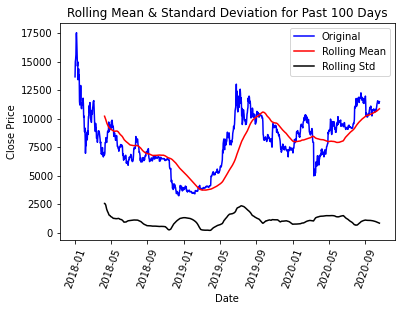

Results of Dickey-Fuller Test:
Test Statistic                   -2.976836
p-value                           0.037115
# Lags Used                       2.000000
Number of Observations Used    1019.000000
Critical Value (1%)              -3.436784
Critical Value (5%)              -2.864381
Critical Value (10%)             -2.568282
dtype: float64


In [20]:
# Check staionality
from statsmodels.tsa.stattools import adfuller
def test_stationarity(data,target, window):
    
    #Determing rolling statistics
    rolmean = data[target].rolling(window).mean()
    rolstd = data[target].rolling(window).std()

    #Plot rolling statistics:
    orig = plt.plot(data['timestamp2'],data[target], color='blue',label='Original')
    mean = plt.plot(data['timestamp2'],rolmean, color='red', label='Rolling Mean')
    std = plt.plot(data['timestamp2'],rolstd, color='black', label = 'Rolling Std')
    plt.xticks(rotation=70)
    plt.legend(loc='best')
    plt.title(f"Rolling Mean & Standard Deviation for Past {window} Days")
    plt.xlabel("Date")
    plt.ylabel("Close Price")
    plt.show(block=False)

    # Perform Dickey-Fuller test:
    # Null Hypothesis (H_0): time series is not stationary
    # Alternate Hypothesis (H_1): time series is stationary
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(data[target], 
                      autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], 
                         index = ['Test Statistic',
                                  'p-value',
                                  '# Lags Used',
                                  'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

test_stationarity(df,target = 'close', window = 100)
# p-value = 0.03 means we have evidence to reject null hypothesis (that time series is not stationary)

In [24]:
# Transformation
# Transformation - log ts
df['close_log'] = df['close'].apply(lambda x: np.log(x))

# Transformation - 7-day moving averages of log ts
df['close_log_moving_avg'] = df['close_log'].rolling(window = 7,center = False).mean()

# Transformation - 7-day moving average ts
df['close_moving_avg'] = df['close'].rolling(window = 7,center = False).mean()

# Transformation - Difference between logged ts and first-order difference logged ts
df['close_log_diff'] = df['close_log'].diff()

# Transformation - Difference between ts and moving average ts
df['close_moving_avg_diff'] = df['close'] - df['close_moving_avg']

# Transformation - Difference between logged ts and logged moving average ts
df['close_log_moving_avg_diff'] = df['close_log'] - df['close_log_moving_avg']

# Transformation - Difference between logged ts and logged moving average ts
df_transform = df.dropna()

print(df_transform.info())
print(df_transform[['close_log_moving_avg_diff','close_moving_avg_diff','close_log_diff']].head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 6 to 1021
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Unnamed: 0                 1016 non-null   int64         
 1   high                       1016 non-null   float64       
 2   low                        1016 non-null   float64       
 3   open                       1016 non-null   float64       
 4   close                      1016 non-null   float64       
 5   marketcap                  1016 non-null   float64       
 6   volume                     1016 non-null   float64       
 7   timestamp                  1016 non-null   object        
 8   slug                       1016 non-null   object        
 9   cmc_rank                   1016 non-null   int64         
 10  timestamp2                 1016 non-null   datetime64[ns]
 11  close_log                  1016 non-null   float64       
 12  close_

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

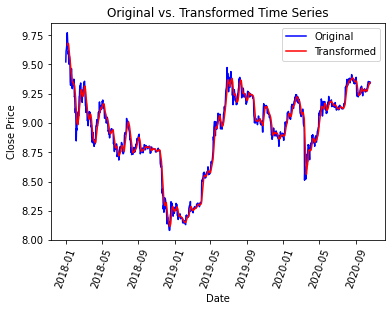

In [26]:
def plot_transform(data, target, transform):
    #Plot rolling statistics:
    orig = plt.plot(data['timestamp2'],data[target], color='blue',label='Original')
    transform = plt.plot(data['timestamp2'],data[transform], color='red', label='Transformed')
    plt.xticks(rotation=70)
    plt.legend(loc='best')
    plt.title(f"Original vs. Transformed Time Series")
    plt.xlabel("Date")
    plt.ylabel("Close Price")
    plt.show(block=False)

plot_transform(data = df, target = "close_log", transform = "close_log_moving_avg")

In [4]:
# AR example
from statsmodels.tsa.ar_model import AutoReg
# fit model
model = AutoReg(df['close'], lags=1)
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(len(df), len(df))
print(df['close'].iloc[-1])
print(yhat) # true value on 1019 close = 11742

11483.35971184
1022    11441.786151
dtype: float64


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  FutureWarning,


In [22]:
from statsmodels.tsa.arima_model import ARMA
# fit model
model = ARMA(df['close'], order=(0, 1))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.predict(len(df), len(df))
print(yhat) # true value on 1019 close = 11742

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


1022    9752.208723
dtype: float64


## **Scrape Bitcoin**

### **1. Historical data of Bitcoin**

In [14]:
from datetime import datetime,timedelta
yesterday = (datetime.today() - timedelta(days=1)).strftime('%Y%m%d')

In [15]:
page = requests.get("https://coinmarketcap.com/currencies/bitcoin/historical-data/?start=20200101&end={yesterday}")
soup = BeautifulSoup(page.content, 'html.parser')
data = soup.find('script', id = "__NEXT_DATA__",type = "application/json")
historical_data= json.loads(data.contents[0])

In [16]:
quotes = historical_data['props']['initialState']['cryptocurrency']['ohlcvHistorical']['1']['quotes']
print(quotes)

[{'time_open': '2020-01-01T00:00:00.000Z', 'time_close': '2020-01-01T23:59:59.999Z', 'time_high': '2020-01-01T15:42:01.000Z', 'time_low': '2020-01-01T01:06:01.000Z', 'quote': {'USD': {'open': 7194.89197053, 'high': 7254.33061134, 'low': 7174.94415256, 'close': 7200.17439274, 'volume': 18565664996.7884, 'market_cap': 130580829149.587, 'timestamp': '2020-01-01T23:59:59.999Z'}}}, {'time_open': '2020-01-02T00:00:00.000Z', 'time_close': '2020-01-02T23:59:59.999Z', 'time_high': '2020-01-02T01:30:00.000Z', 'time_low': '2020-01-02T23:02:01.000Z', 'quote': {'USD': {'open': 7202.55112207, 'high': 7212.15525252, 'low': 6935.26997193, 'close': 6985.47000061, 'volume': 20802083465.3292, 'market_cap': 126699395235.204, 'timestamp': '2020-01-02T23:59:59.999Z'}}}, {'time_open': '2020-01-03T00:00:00.000Z', 'time_close': '2020-01-03T23:59:59.999Z', 'time_high': '2020-01-03T17:04:00.000Z', 'time_low': '2020-01-03T02:10:01.000Z', 'quote': {'USD': {'open': 6984.4286123, 'high': 7413.71509934, 'low': 6914.9

In [19]:
# convert it to pandas dataframe
high = []
low = []
open = []
close = []
market_cap = []
volume = []
timestamp = []
name = []
symbol = []
slug = []

for j in quotes:
  market_cap.append(j['quote']['USD']['market_cap'])
  volume.append(j['quote']['USD']['volume'])
  timestamp.append(j['quote']['USD']['timestamp'])
  high.append(j['quote']['USD']['high'])
  low.append(j['quote']['USD']['low'])
  open.append(j['quote']['USD']['open'])
  close.append(j['quote']['USD']['close'])

df = pd.DataFrame(columns = ['high','low','open','close','marketcap', 'volume', 'timestamp','name'])
df['high'] = high
df['low'] = low
df['open'] = open
df['close'] = close
df['marketcap'] = market_cap
df['volume'] = volume
df['timestamp'] = timestamp
df['name'] = ['Bitcoin']*len(df)
df.sort_values('timestamp')
print(df.info())
print(df[['timestamp','close']].iloc[-1])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293 entries, 0 to 292
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   high       293 non-null    float64
 1   low        293 non-null    float64
 2   open       293 non-null    float64
 3   close      293 non-null    float64
 4   marketcap  293 non-null    float64
 5   volume     293 non-null    float64
 6   timestamp  293 non-null    object 
 7   name       293 non-null    object 
dtypes: float64(6), object(2)
memory usage: 18.4+ KB
None
timestamp    2020-10-19T23:59:59.999Z
close                           11742
Name: 292, dtype: object


### **Vis**

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np
layout = {
  "title": "Bitcoin: Open Price from 2020-01-01 to " + (datetime.today() - timedelta(days=1)).strftime('%Y-%m-%d')}
fig = go.Figure(layout=layout)
fig.add_trace(go.Scatter(
    x=df['timestamp'],
    y=df['low'], 
    name="Low Price",
    line_color='red', 
    line=dict(width=0.2)))
fig.add_trace(go.Scatter(
    x=df['timestamp'],
    y=df['high'],
    name="High Price",
    fill='tonexty', # fill area between trace0 and trace1
    mode='lines', line_color='green',
    fillcolor="rgba(0,40,100,0.2)",
    line=dict(width=0.2)))
fig.add_trace(
  go.Scatter(
      x=df['timestamp'], 
      y=df['open'], 
      line_color='black',
      name="Open Price"))
# Set x-axis title
fig.update_xaxes(title_text="Date")
# Set y-axes titles
fig.update_yaxes(title_text="Price")
fig.show()

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np
layout = {
  "title": "Bitcoin: Close Price from 2020-01-01 to " + (datetime.today() - timedelta(days=1)).strftime('%Y-%m-%d')}
fig = go.Figure(layout=layout)
fig.add_trace(go.Scatter(
    x=df['timestamp'],
    y=df['low'], 
    name="Low Price",
    line_color='red', 
    line=dict(width=0.2)))
fig.add_trace(go.Scatter(
    x=df['timestamp'],
    y=df['high'],
    name="High Price",
    fill='tonexty', # fill area between trace0 and trace1
    mode='lines', line_color='green',
    fillcolor="rgba(0,40,100,0.2)",
    line=dict(width=0.2)))
fig.add_trace(
  go.Scatter(
      x=df['timestamp'], 
      y=df['close'], 
      line_color='black',
      name="Close Price"))
# Set x-axis title
fig.update_xaxes(title_text="Date")
# Set y-axes titles
fig.update_yaxes(title_text="Price")
fig.show()

### **2. Latest data, ranked by market capital**

In [12]:
page = requests.get("https://coinmarketcap.com/coins/")
soup = BeautifulSoup(page.content, 'html.parser')
# print(soup.prettify)
data = soup.find('script', id = "__NEXT_DATA__",type = "application/json")
rank_data= json.loads(data.contents[0])


In [14]:
print(rank_data['props']['initialState']['cryptocurrency'].keys())
#print(rank_data['props']['initialState']['cryptocurrency']['listingLatest']['data'])
#quotes = rank_data['props']['initialState']['cryptocurrency']['quote']
print(quotes)

dict_keys(['listingLatest', 'listingHistorical', 'new', 'watchlist', 'map', 'info', 'prices', 'quotesLatest', 'quotesHistorical', 'ohlcvHistorical', 'related', 'marketPairsLatest', 'pricePerformanceStatsLatest', 'topDerivatives', 'yieldFarmingRankingLatest'])
{'data': [], 'slugMap': {}}


In [ ]:
#for j in quotes:
#  print(j)

names = []
for j in quotes:
  names.append(j['quote'].keys())

print(names[0])

In [11]:
# convert it to pandas dataframe
slug = []
price = []
volume_24h = []
percent_change_1h = []
percent_change_24h = []
percent_change_7d = []
market_cap = []
last_updated = []

for j in quotes:
  slug.append(j['slug'])
  price.append(j['quote']['USD']['price'])
  volume_24h.append(j['quote']['USD']['volume_24h'])
  percent_change_1h.append(j['quote']['USD']['percent_change_1h'])
  percent_change_24h.append(j['quote']['USD']['percent_change_24h'])
  percent_change_7d.append(j['quote']['USD']['percent_change_7d'])
  market_cap.append(j['quote']['USD']['market_cap'])
  last_updated.append(j['quote']['USD']['last_updated'])

df = pd.DataFrame(columns = ['slug','price','volume_24h','percent_change_1h','percent_change_24h','percent_change_7d', 'market_cap', 'last_updated']) # ,'name'
df['price'] = price
df['volume_24h'] = volume_24h
df['percent_change_1h'] = percent_change_1h
df['percent_change_24h'] = percent_change_24h
df['percent_change_7d'] = percent_change_7d
df['market_cap'] = market_cap
df['last_updated'] = last_updated
df['slug'] = slug
df.sort_values('market_cap')
print(df.info())
print(df[['slug','price','market_cap']])

TypeError: ignored

In [ ]:
print(historical_data['props']['initialState']['cryptocurrency']['ohlcvHistorical'].keys())
print(historical_data['props']['initialState']['cryptocurrency']['ohlcvHistorical']['1']['quotes'])